# Task formulation
Let's imagine that the international cruise agency Carnival Cruise Line decided to advertise itself with the help of banners and turned to you for this. To test whether such banners are of great use, only 20 of them will be placed around the world. You need to choose 20 such locations for placement, so that the benefits are great and the agency continues to cooperate with you.

The agency is large and has several offices around the world. It wants to place banners near these offices - it is easier to negotiate and check the result. Also, these places should be popular with tourists.

To find the best places, we will use the database of the largest social network based on locations - Foursquare.

Using pandas, let's build a DataFrame and make sure that all 396634 rows with coordinates were read successfully.

Now it is necessary to cluster these coordinates in order to identify the centers of tourist congestion. Since banners have a relatively small area of ​​action, we need an algorithm that allows us to limit the size of the cluster and does not depend on the number of clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('checkins.dat', header=0, sep='|')
raw_data.drop(0, inplace=True)
raw_data.drop(raw_data.shape[0] -1, inplace=True)

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_data = raw_data.sample(frac=1)

In [4]:
usable_data = raw_data.loc[(raw_data['     longitude     '].astype(str) != '                   ') & (raw_data['     latitude      '].astype(str) != '                   ')]
usable_data.reset_index(inplace=True, drop=True)


#   I have a huge massive of data - so i decide to split it for 100.000 dotes to minimize calculation time

In [5]:
split_data = usable_data.loc[0:100000]
split_data.columns = ['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'creation time']
split_data

,id,user_id,venue_id,latitude,longitude,creation time
0,84636,399760.0,23008.0,40.65,-73.95,2011-12-10 20:02:36
1,404822,145979.0,53196.0,38.8951118,-77.0363658,2011-12-27 04:54:35
2,541698,304755.0,16090.0,35.2270869,-80.8431267,2012-01-27 19:30:36
3,891635,363243.0,5222.0,38.8951118,-77.0363658,2012-04-02 16:38:36
4,52574,1209604.0,117315.0,20.8783333,-156.6825,2011-12-10 04:06:08
...,...,...,...,...,...,...
99996,830795,510886.0,151148.0,33.4941704,-111.9260519,2012-03-31 17:45:51
99997,804342,812017.0,11138.0,39.7391536,-104.9847034,2012-03-24 14:39:20
99998,587601,1080002.0,25208.0,40.7329606,-73.9884556,2012-01-28 22:35:41
99999,48557,84824.0,169371.0,41.8781136,-87.6297982,2011-12-10 04:59:18


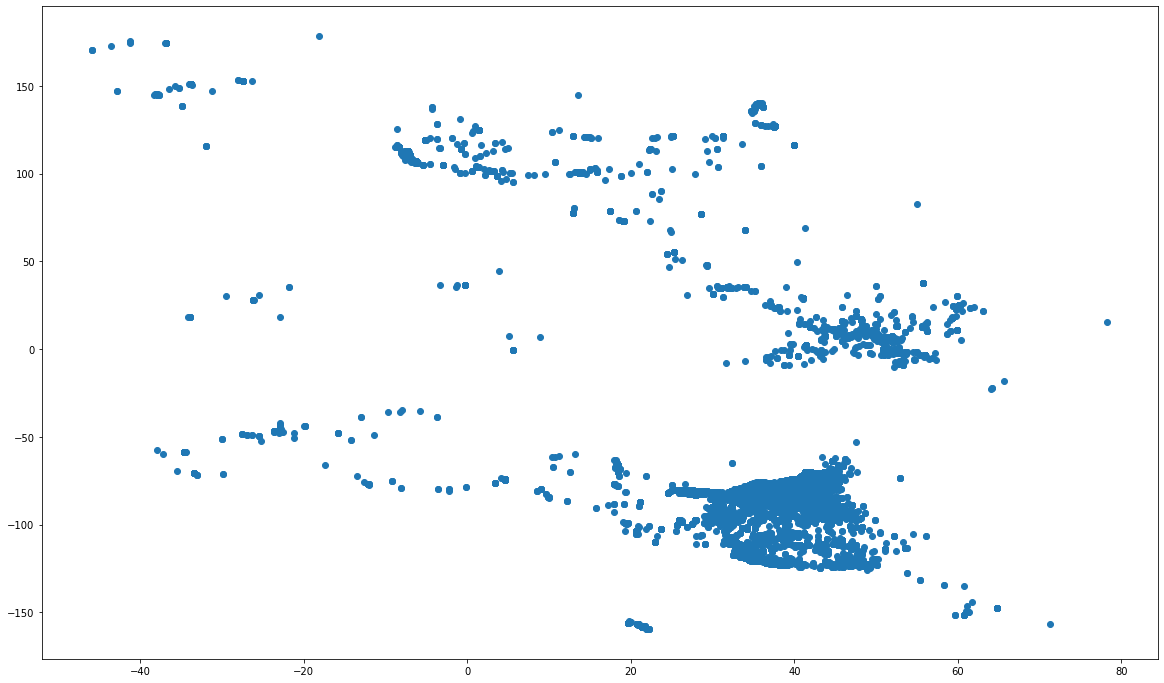

In [6]:
latitude = []
longitude = []
for arrow in range(split_data.shape[0]):
    latitude.append(float(split_data.loc[arrow, 'latitude']))
    longitude.append(float(split_data.loc[arrow, 'longitude']))

plt.figure(figsize=(20,12))
plt.plot(latitude, longitude, 'o')

In [7]:
X = np.array(split_data[['latitude', 'longitude']].astype(float))

[ 40.65 -73.95]
[ 38.8951118 -77.0363658]
[ 35.2270869 -80.8431267]
[ 38.8951118 -77.0363658]
[  20.8783333 -156.6825   ]
[  23.634501 -102.552784]
[ 44.7132969 -93.4227274]
[ 40.65 -73.95]
[ 38.8114364 -89.953157 ]
[  33.4222685 -111.8226402]
[  33.3528264 -111.789027 ]
[ 41.0814447 -81.5190053]
[ 43.4252776 -88.1834277]
[ 33.5604168 -81.7195533]
[  39.7391536 -104.9847034]
[  37.4418834 -122.1430195]
[ 41.7620842 -72.7420151]
[  33.1958696 -117.3794834]
[ 38.8858407 -94.5330096]
[ 33.800745 -84.41052 ]
[51.5001524 -0.1262362]
[  33.7414064 -118.1047866]
[ 22.31326 114.22581]
[ 40.715972 -74.001437]
[ 44.9799654 -93.2638361]
[ 42.0333636 -87.7333934]
[ 40.1105875 -88.2072697]
[ 35.7564719 -83.9704593]
[ 27.9658533 -82.8001026]
[  40.7607793 -111.8910474]
[ 33.7489954 -84.3879824]
[ 38.5200504 -89.9839935]
[  39.977763  -105.1319296]
[  47.6062095 -122.3320708]
[ 40.715972 -74.001437]
[  33.4483771 -112.0740373]
[ 38.5903972 -76.9402506]
[  33.3061605 -111.8412502]
[ 28.0394654 -81.949

In [8]:
from sklearn.cluster import MeanShift

cluster = MeanShift(bandwidth=0.1)
predictions = cluster.fit_predict(X)

In [9]:
split_data['Кластер'] = predictions
split_data

<ipython-input-9-d84bc1db6c6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_data['Кластер'] = predictions


,id,user_id,venue_id,latitude,longitude,creation time,Кластер
0,84636,399760.0,23008.0,40.65,-73.95,2011-12-10 20:02:36,0
1,404822,145979.0,53196.0,38.8951118,-77.0363658,2011-12-27 04:54:35,3
2,541698,304755.0,16090.0,35.2270869,-80.8431267,2012-01-27 19:30:36,40
3,891635,363243.0,5222.0,38.8951118,-77.0363658,2012-04-02 16:38:36,3
4,52574,1209604.0,117315.0,20.8783333,-156.6825,2011-12-10 04:06:08,686
...,...,...,...,...,...,...,...
99996,830795,510886.0,151148.0,33.4941704,-111.9260519,2012-03-31 17:45:51,2
99997,804342,812017.0,11138.0,39.7391536,-104.9847034,2012-03-24 14:39:20,20
99998,587601,1080002.0,25208.0,40.7329606,-73.9884556,2012-01-28 22:35:41,0
99999,48557,84824.0,169371.0,41.8781136,-87.6297982,2011-12-10 04:59:18,1


In [10]:
BIG_CLUSTER_DETECT = 15
unique_clusters = np.unique(predictions, return_counts=True)
big_clusters = []
for i in range(len(unique_clusters[0])):
    if unique_clusters[1][i] >= BIG_CLUSTER_DETECT:
        big_clusters.append(unique_clusters[0][i])
for arrow in range(split_data.shape[0]):
    if not big_clusters.__contains__(split_data.loc[arrow, 'Кластер']):
        split_data.loc[arrow, 'Кластер'] = 'Small Cluster'

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Counting cluster centers

In [11]:
cluster_tags = []
cluster_centers = []
split_data = split_data.loc[split_data['Кластер'].astype(str) != 'Small Cluster']
for _cluster_tag_ in split_data['Кластер'].unique():
    buffer = split_data.loc[split_data['Кластер'] == _cluster_tag_]
    buffer.reset_index(inplace=True, drop=True)
    cluster_tags.append(_cluster_tag_)
    long = buffer['longitude'].astype(float).mean()
    lati = buffer['latitude'].astype(float).mean()
    cluster_centers.append([long, lati])

In [12]:
'''
print('OWN CENTER:', sum(split_data['longitude'].astype(float)) / split_data['longitude'].shape[0])
print('MEAN:', split_data['longitude'].astype(float).mean())
'''

"\nprint('OWN CENTER:', sum(split_data['longitude'].astype(float)) / split_data['longitude'].shape[0])\nprint('MEAN:', split_data['longitude'].astype(float).mean())\n"

In [16]:
distances_to_office = []
save_coord = []
office = [[33.751277, -118.188740], [25.867736, -80.324116], [51.503016, -0.075479],
          [52.378894, 4.885084], [39.366487, 117.036146], [-33.868457, 151.205134]]
offices_uses = []
for _ in office:
    for __ in cluster_centers:
        distances_to_office.append(np.sqrt(((_[0] - __[1]) ** 2) + ((_[1] - __[0]) ** 2)))
        save_coord.append(__)
        offices_uses.append(_)

In [17]:
import operator

saves = list(zip(distances_to_office, save_coord, offices_uses))
#sorted_arrays = sorted(saves, lambda x: x[0])
sorted_arrays = sorted(saves, key= operator.itemgetter(0))
sorted_arrays

[(0.004427579086975555,
  [151.2085708386364, -33.86566565681819],
  [-33.868457, 151.205134]),
 (0.009576420935694016,
  [4.892478347826086, 52.372808652173916],
  [52.378894, 4.885084]),
 (0.0357631989761431,
  [-80.29558475396826, 25.88929926507937],
  [25.867736, -80.324116]),
 (0.047838170531524934,
  [-0.12329095737704918, 51.50459944295082],
  [51.503016, -0.075479]),
 (0.06421430195962645,
  [-118.15578488338984, 33.80638994644068],
  [33.751277, -118.18874]),
 (0.1396375983519577,
  [-80.21489867304348, 25.780728906231882],
  [25.867736, -80.324116]),
 (0.19485318485628716,
  [-80.19886003135593, 26.016996530508486],
  [25.867736, -80.324116]),
 (0.20397996458179837,
  [-118.05419903865032, 33.90459547791411],
  [33.751277, -118.18874]),
 (0.2103249585337434,
  [-118.36668285058825, 33.86340607788236],
  [33.751277, -118.18874]),
 (0.26590660096375074,
  [-80.34452452000001, 26.132858259999995],
  [25.867736, -80.324116]),
 (0.2689237771750956,
  [-117.94260758553457, 33.64293

In [15]:
distances_to_office
save_coord

[[-73.98931503537666, 40.71726999594512],
 [-77.04932942834007, 38.89356748087335],
 [-80.8438896671717, 35.22572696439395],
 [-111.8228340291699, 33.35725756532195],
 [-81.51827238936171, 41.08256172553192],
 [-104.98746856945873, 39.738256254639175],
 [-122.10067296025848, 37.400114755411956],
 [-72.68503689333333, 41.74951796],
 [-117.34577499052637, 33.18265386],
 [-84.39613676172567, 33.76787679325221],
 [-0.12329095737704918, 51.50459944295082],
 [-118.15578488338984, 33.80638994644068],
 [114.13590872075476, 22.36176960943396],
 [-93.26373100723984, 44.9803871476018],
 [-87.73358882907802, 42.04766374113475],
 [-88.23421129365084, 40.114939028571435],
 [-82.8003349368421, 27.950794924561404],
 [-111.89403246732029, 40.7607168261438],
 [-89.93534774, 38.558126013333336],
 [-105.08187782564103, 39.98733542564103],
 [-122.33200717577185, 47.60649843234899],
 [-112.0741071608922, 33.44844861100373],
 [-76.937985644, 38.683076035999996],
 [-81.94897877173914, 28.038970934782604],
 [-